In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross")

In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from tt_cross.src.functions import *
from tt_cross.src.dmrg_cross import *

In [3]:
# Testing the slater function

slater(x=[1, 2, 3, 4], num_variables=4)

0.0007633268329680491

In [4]:
# grid_creation
num_var = 40
subdivision = 25
temp = [np.linspace(0.5, 2, subdivision) for _ in range(num_var)]
grid = np.array(temp)
grid

array([[0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.93

In [5]:
# integrator initialization

example_integrator = greedy_cross(
    func=lambda x: 1, num_variables=num_var, grid=grid, tol=1e-2, max_bond=5, sweeps=3, is_f_complex=False
)

In [6]:
example_integrator._create_initial_index_sets()
example_integrator.i

array([array([[1.]]), array([[0.75]]), array([[0.75  , 0.8125]]),
       array([[0.75  , 0.8125, 2.    ]]),
       array([[0.75  , 0.8125, 2.    , 0.875 ]]),
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625]]),
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625, 1.3125]]),
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625, 1.3125, 0.9375]]),
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625, 1.3125, 0.9375, 0.8125]]),
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625, 1.3125, 0.9375, 0.8125,
               1.8125]])                                                      ,
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625, 1.3125, 0.9375, 0.8125,
               1.8125, 0.5   ]])                                              ,
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625, 1.3125, 0.9375, 0.8125,
               1.8125, 0.5   , 1.    ]])                                      ,
       array([[0.75  , 0.8125, 2.    , 0.875 , 1.5625, 1.3125, 0.9375, 0.8125,
      

In [7]:
example_integrator._create_initial_bonds()
example_integrator.compute_single_site_tensor(2)

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]])

In [8]:
example_integrator.index_update(2)

In [9]:
example_integrator.i[3]

array([[0.75  , 0.8125, 2.    ]])

In [10]:
example_integrator.bonds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
example_integrator = greedy_cross(
    func=slater, num_variables=num_var, grid=grid, tol=1e-5, max_bond=10, sweeps=6, is_f_complex=False
)

example_integrator.run()

array([array([[[2.31885461e-05, 2.58368009e-05, 1.90886583e-05],
               [2.30879268e-05, 2.57232714e-05, 1.90076542e-05],
               [2.29760460e-05, 2.55970445e-05, 1.89175730e-05],
               [2.28530917e-05, 2.54583351e-05, 1.88185622e-05],
               [2.27192691e-05, 2.53073778e-05, 1.87107833e-05],
               [2.25748005e-05, 2.51444269e-05, 1.85944113e-05],
               [2.24199245e-05, 2.49697549e-05, 1.84696338e-05],
               [2.22548952e-05, 2.47836521e-05, 1.83366509e-05],
               [2.20799813e-05, 2.45864258e-05, 1.81956742e-05],
               [2.18954658e-05, 2.43783988e-05, 1.80469266e-05],
               [2.17016445e-05, 2.41599092e-05, 1.78906413e-05],
               [2.14988256e-05, 2.39313086e-05, 1.77270613e-05],
               [2.12873287e-05, 2.36929618e-05, 1.75564388e-05],
               [2.10674837e-05, 2.34452452e-05, 1.73790342e-05],
               [2.08396302e-05, 2.31885461e-05, 1.71951157e-05],
               [2.0604116

In [12]:
example_integrator.bonds

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 4])

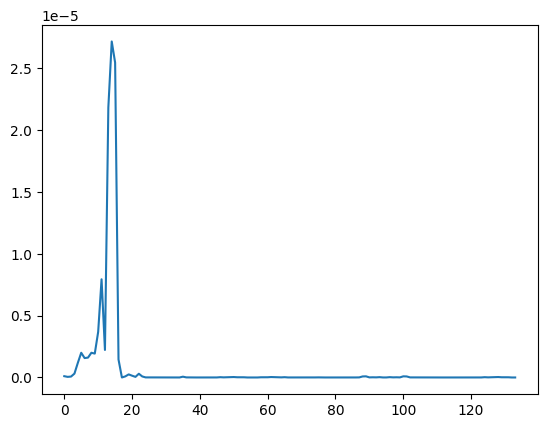

In [13]:
plt.plot(example_integrator.error[100:])

## 1D Interpolator


In [14]:
def f(x):
    return x

In [15]:
interval = [0, 25]
d = 15


sinc_interpolator = one_dim_function_interpolator(
    func=np.sinc,
    interval=interval,
    d=d,
    complex_function=False,
)

In [16]:
sinc_interpolator.func_from_binary([0 for _ in range(3)])

0.9999997606306061

In [17]:
sinc_interpolator.h

0.000762939453125

In [18]:
sinc_interpolator.interpolate(
    max_bond=5,
    tol=1e-10,
    sweeps=3,
)

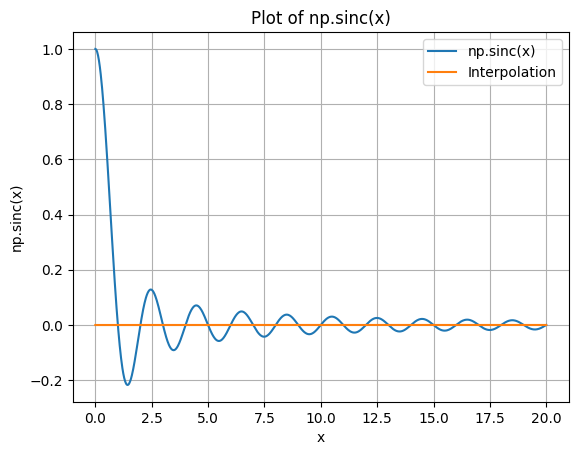

In [19]:
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 1000)
y = np.sinc(x)
interpolation = np.array([sinc_interpolator.eval(x_i) for x_i in x])

plt.plot(x, y, label="np.sinc(x)")
plt.plot(x, interpolation, label="Interpolation")

plt.xlabel("x")
plt.ylabel("np.sinc(x)")
plt.title("Plot of np.sinc(x)")
plt.legend()
plt.grid(True)
plt.show()

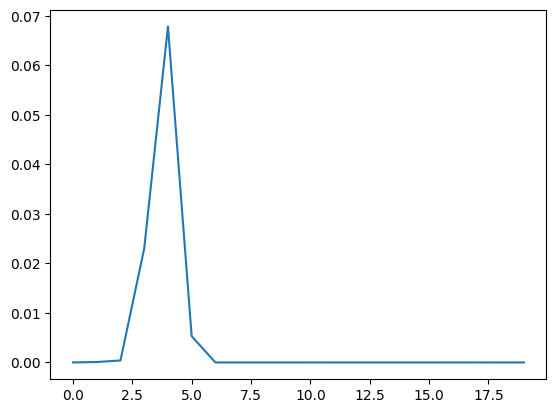

In [21]:
plt.plot(sinc_interpolator.interpolator.error[-20:])

In [21]:
sinc_interpolator.eval(0)

-5.621992245234823e-06

In [20]:
np.sinc(10)

-3.898171832519376e-17

In [47]:
sinc_interpolator.func_from_binary([0 for _ in range(20)])

0.9999997606306061

In [48]:
for t in sinc_interpolator.interpolation:
    print(t.shape)

(1, 2, 2)
(2, 2, 4)
(4, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 5)
(5, 2, 4)
(4, 2, 4)
(4, 2, 4)
(4, 2, 3)
(3, 2, 2)
(2, 2, 1)


In [49]:
sinc_interpolator.interpolation

array([array([[[0.99999976, 0.03605358],
               [0.025464  , 0.01198958]]]),
       array([[[ 0.99999976, -0.03908779,  0.05641202, -0.05792212],
               [ 0.03605358, -0.0313828 ,  0.00564323, -0.02101817]],

              [[ 0.025464  , -0.0188113 , -0.01030729, -0.0017575 ],
               [ 0.01198958, -0.00555233, -0.01332321,  0.00832586]]]),
       array([[[ 0.99999976, -0.19970741,  0.11971836,  0.11983282,
                -0.13940894],
               [-0.03908779,  0.05641202, -0.05792212, -0.05792772,
                 0.05945348]],

              [[ 0.03605358, -0.02259425,  0.03545921,  0.0354303 ,
                -0.04159239],
               [-0.0313828 ,  0.00564323, -0.02101817, -0.0209755 ,
                 0.0298602 ]],

              [[ 0.025464  ,  0.00444242,  0.01013157,  0.01008572,
                -0.01998461],
               [-0.0188113 , -0.01030729, -0.0017575 , -0.00171517,
                 0.01130731]],

              [[ 0.01198958,  0.01303984

In [24]:
for i in range(sinc_interpolator.d - 1):
    print(np.concatenate((sinc_interpolator.interpolator.i[i + 1], sinc_interpolator.interpolator.j[i]), axis=1))
    print("==============================")

[[1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]]
[[1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]]
[[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.]]
[[1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1